In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sc=pd.read_excel("D:\RMIT Semester 4\Data Science Postgraduate project/Case Files Nov Care Donation.xlsx")
sc

,Date,Interviewer,Name,Gender:,DOB (MM/DD/YYYY),Title,Email:,Address (or suburb if homeless):,Physical proof of ID,Marital status,...,Children/dependents,Children's needs,Attitude,Level of intervention,Comments,Consent to share,Future Contact,Photo of ID Type,Item Type,Path
0,2020-12-03,NaN,Zini Sheriff,Male,1954-08-27,0439770550,zininiz@hotmail.com,"Agg St, Thornbury",Aged Pension Card,Single,...,NaN,NaN,Positive,Low,NaN,True,NaN,NaN,Item,sites/UI/Lists/Case Management Questionnaire
1,2020-12-07,NaN,Angelo Diiorio,Male,1951-06-26,0417195197,non@nil.com,Unit 48 number 3 Agg St Thornbury 3071,Pension card,Single,...,NaN,NaN,Positive,Low,NaN,True,NaN,NaN,Item,sites/UI/Lists/Case Management Questionnaire
2,2020-12-06,NaN,mr. n Bulman,Male,1969-01-05,0411746847c,nil,"U 17 3 Agg St, Thornbury 3071",Umployment Card:710297103601,In Relationship,...,NaN,NaN,Positive,Low,NaN,False,NaN,NaN,Item,sites/UI/Lists/Case Management Questionnaire
3,1966-07-12,NaN,Jenny Freebairn,Female,1966-07-20,0401939702,jenny.freebairn20@hotmail.com,"U 4/57 Warwick rd, Pascoe Vale, Vic 3044",Driver License: 040553643,In Relationship,...,NaN,NaN,Positive,Low,NaN,False,NaN,NaN,Item,sites/UI/Lists/Case Management Questionnaire
4,2020-12-08,NaN,Kshittiz Nyaupane,Male,1993-07-20,0426824992,kshitiz.cwin@gmail.com,"30 Charming Street, Hampton East, 3188, VIC",Passport: 11142693,Married,...,NaN,NaN,Neutral,Low,NaN,True,NaN,NaN,Item,sites/UI/Lists/Case Management Questionnaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2021-01-05,Meiqi Li,Annie Reyes,Male,1983-10-15,0478699127,aneey316@yahoo.com,"Roxburgh Park, VIC 3064",7718665,Single,...,NaN,NaN,Neutral,Low,"Annie is unemployed for more than 6 months, sh...",False,0.0,NaN,Item,sites/UI/Lists/Case Management Questionnaire
65,2021-01-05,Meiqi Li,Mahak Khera,Female,1989-03-21,0481385968,mahak.virmani1989@gmail.com,Reservoir,"s3701260, Student ID",Married,...,NaN,NaN,Neutral,Low,Mehak feels more confident by wearing new clot...,False,0.0,NaN,Item,sites/UI/Lists/Case Management Questionnaire
66,2021-01-19,Richu Tom,Hafiz M W Azeem,Male,1992-09-05,0497150845,waqarazeem24@gmail.com,3 Newton St \nReservoir \n3073,Licence - 039140060,Single,...,NaN,NaN,Positive,Low,Lost home due to fire and needs urgent support...,False,1.0,NaN,Item,sites/UI/Lists/Case Management Questionnaire
67,2021-01-24,Richu Tom,Abishek Sangarapu,Male,1995-08-16,0422005731,shanabi3238@gmail.com,"3 Newton Street, Reservoir",Passport -RO601296,Single,...,NaN,NaN,Neutral,Low,Lost House due to fire. \n,True,0.0,NaN,Item,sites/UI/Lists/Case Management Questionnaire


In [3]:
sc.columns

Index(['Date', 'Interviewer', 'Name', 'Gender:', 'DOB (MM/DD/YYYY)', 'Title',
       'Email:', 'Address (or suburb if homeless):', 'Physical proof of ID',
       'Marital status', 'Visa status', 'Are you a pensioner',
       'Are you employed', 'Duration of unemployment',
       'Education - Are they a student?', 'Educational Institute',
       'Disability ', 'Disability Type', 'Disability - Are needs being met?',
       'Carer information', 'Substance abuse:', 'Hardship during covid-19',
       'Assessment of Needs', 'Children/dependents ', 'Children's needs',
       'Attitude ', 'Level of intervention ', 'Comments', 'Consent to share',
       'Future Contact', 'Photo of ID Type', 'Item Type', 'Path'],
      dtype='object')

In [4]:
x=sc.isnull().sum()
y=sc.isnull().sum()*100/len(sc)
missing_values=pd.DataFrame({'Missing values':x,'Percentage':y})
missing_values

,Missing values,Percentage
Date,0,0.000000
Interviewer,36,52.173913
Name,0,0.000000
Gender:,0,0.000000
DOB (MM/DD/YYYY),2,2.898551
Title,0,0.000000
Email:,13,18.840580
Address (or suburb if homeless):,5,7.246377
Physical proof of ID,2,2.898551
Marital status,1,1.449275


In [5]:
# For columns with missing values we are filling them with "Not Mentioned"

col=['Interviewer','DOB (MM/DD/YYYY)','Email:','Address (or suburb if homeless):','Physical proof of ID','Marital status',
    'Visa status','Are you a pensioner','Duration of unemployment','Educational Institute','Disability Type','Hardship during covid-19',
    'Assessment of Needs','Future Contact','Comments']

for c in col:
    sc[c]=sc[c].fillna('Not Mentioned')

In [6]:
x=sc.isnull().sum()
y=sc.isnull().sum()*100/len(sc)
missing_values=pd.DataFrame({'Missing values':x,'Percentage':y})
missing_values

# For the rest we can see that majority of the data is missing therefore best course of action is to delete those columns

,Missing values,Percentage
Date,0,0.000000
Interviewer,0,0.000000
Name,0,0.000000
Gender:,0,0.000000
DOB (MM/DD/YYYY),0,0.000000
Title,0,0.000000
Email:,0,0.000000
Address (or suburb if homeless):,0,0.000000
Physical proof of ID,0,0.000000
Marital status,0,0.000000


In [7]:
# Deleting the columns which have a lot of missing data
sc=sc.drop(columns=['Carer information',"Children's needs",'Photo of ID Type'])

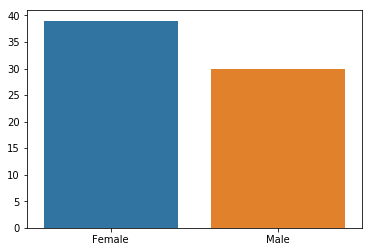

In [10]:
# Gender
sc_g=sc['Gender:'].value_counts()
sns.barplot(sc_g.index, sc_g.values)

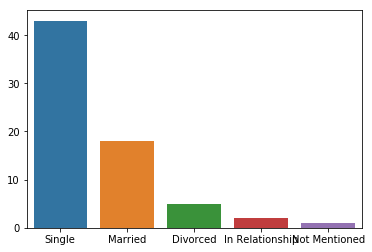

In [12]:
sc_marital=sc['Marital status'].value_counts()
sns.barplot(sc_marital.index,sc_marital.values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

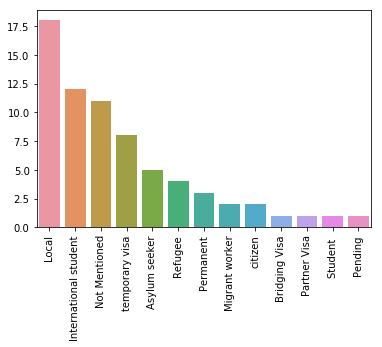

In [21]:
sc_visa=sc['Visa status'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
plt.xticks(rotation=90)

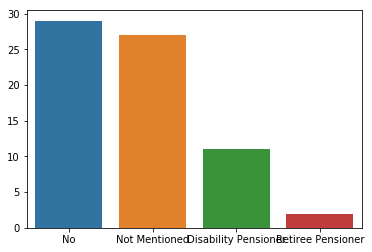

In [23]:
sc_visa=sc['Are you a pensioner'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
#plt.xticks(rotation=90)

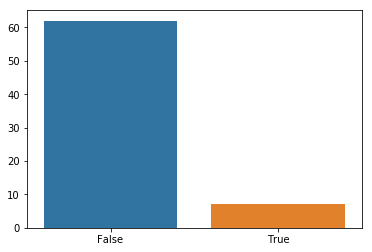

In [24]:
sc_visa=sc['Are you employed'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

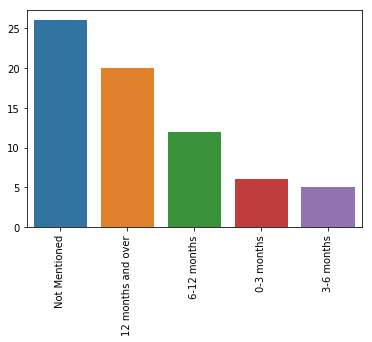

In [26]:
sc_visa=sc['Duration of unemployment'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

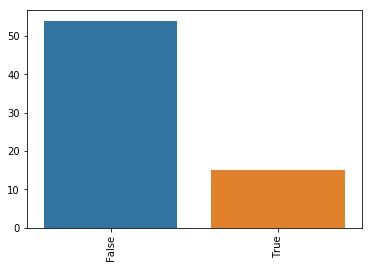

In [27]:
sc_visa=sc['Education - Are they a student?'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
plt.xticks(rotation=90)

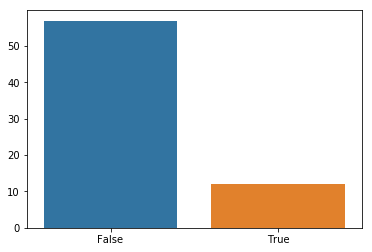

In [31]:
sc_visa=sc['Disability '].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
#plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

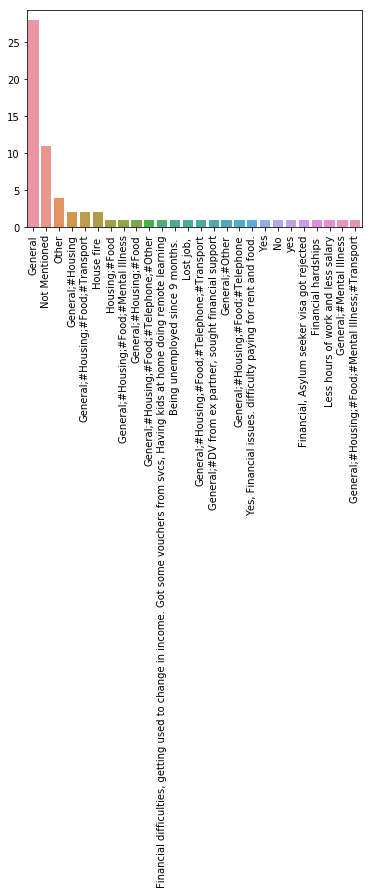

In [34]:
sc_visa=sc['Hardship during covid-19'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

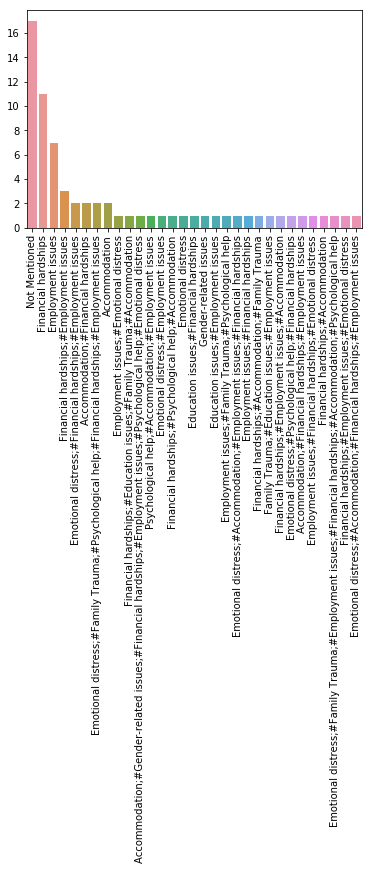

In [35]:
sc_visa=sc['Assessment of Needs'].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)
plt.xticks(rotation=90)

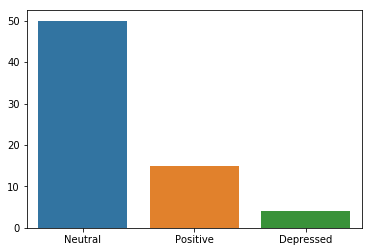

In [37]:
sc_visa=sc['Attitude '].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)

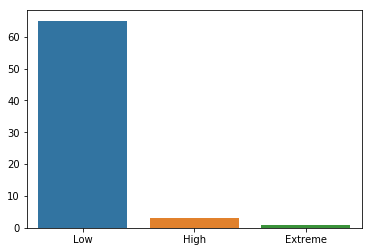

In [39]:
sc_visa=sc['Level of intervention '].value_counts()
sns.barplot(sc_visa.index,sc_visa.values)